<a href="https://colab.research.google.com/github/malakbayramovaa/Machine-Learning/blob/main/classification_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml

mnist=fetch_openml('mnist_784', as_frame=False)

In [2]:
X, y = mnist.data, mnist.target

In [3]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [4]:
X.shape

(70000, 784)

In [5]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
y.shape

(70000,)

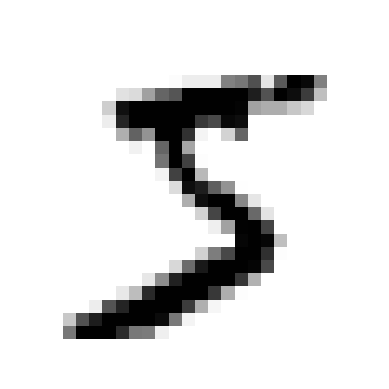

In [7]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
  image=image_data.reshape(28,28)
  plt.imshow(image, cmap='binary')
  plt.axis('off')

some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [8]:
y[0]

'5'

In [9]:
X_train, X_test, y_train, y_test=X[:60000], X[60000:], y[:60000], y[60000:]

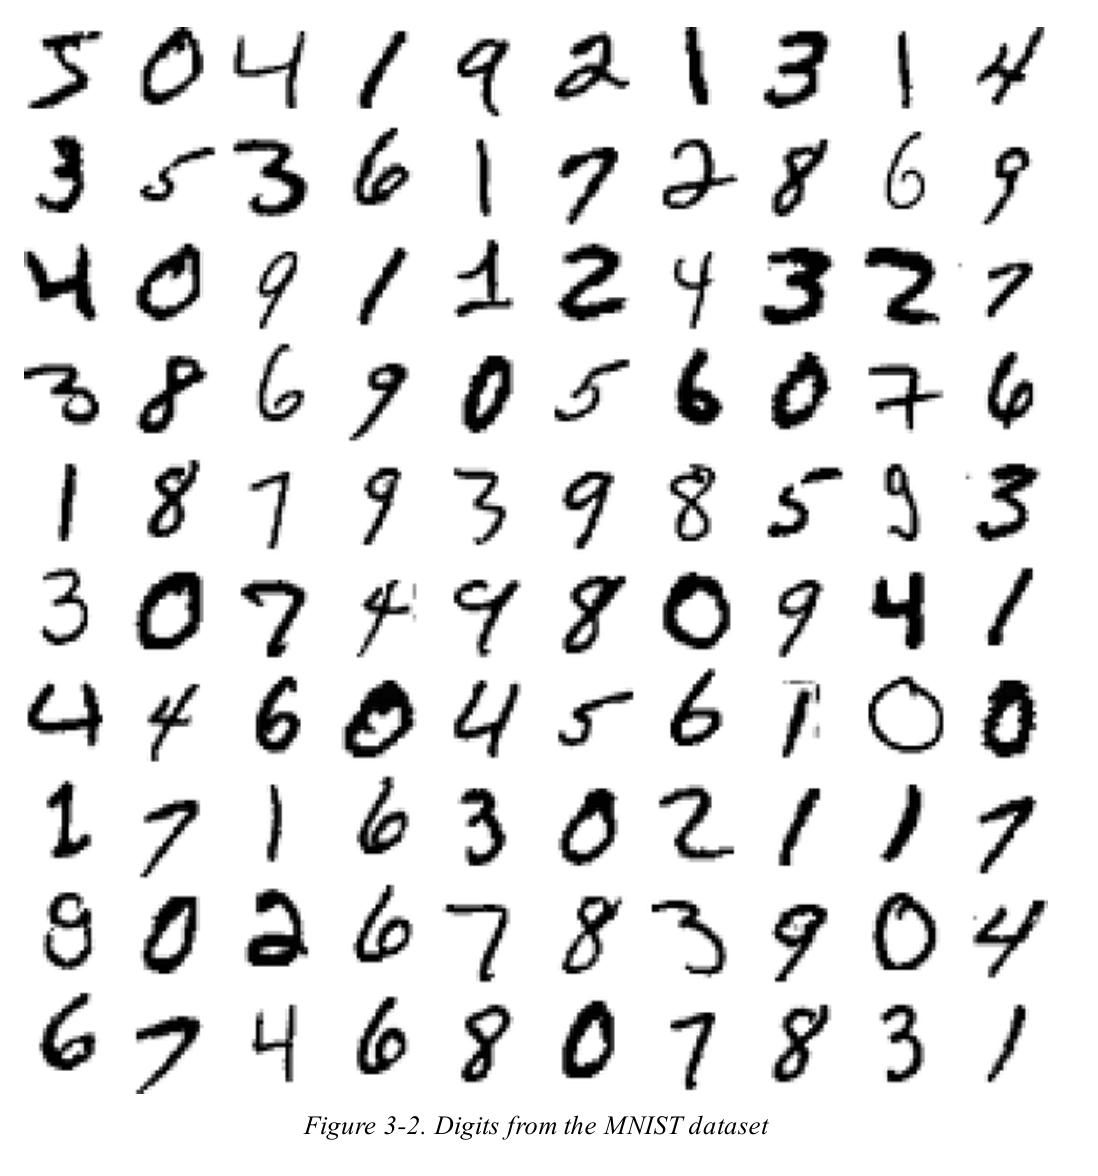

# Training a Binary Classifier

In [10]:
y_train_5=(y_train=='5')
y_test_5=(y_test=='5')

In [11]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [12]:
sgd_clf.predict([some_digit])

array([ True])

# Measuring Accuracy Using Cross-Validation

In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')


array([0.95035, 0.96035, 0.9604 ])

In [14]:
from sklearn.dummy import DummyClassifier

dummy_clf=DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [15]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.90965, 0.90965, 0.90965])

# Confusion Matrices

In [16]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [17]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [18]:
y_train_perfect_predictions=y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

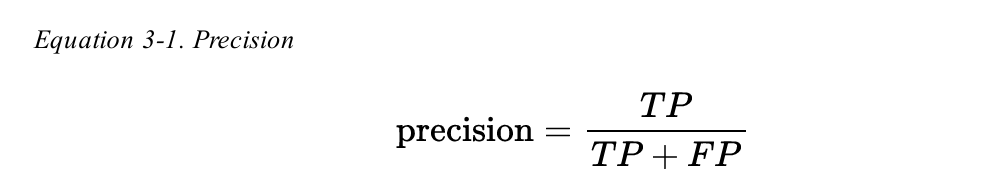

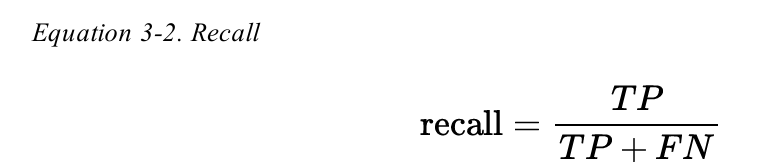

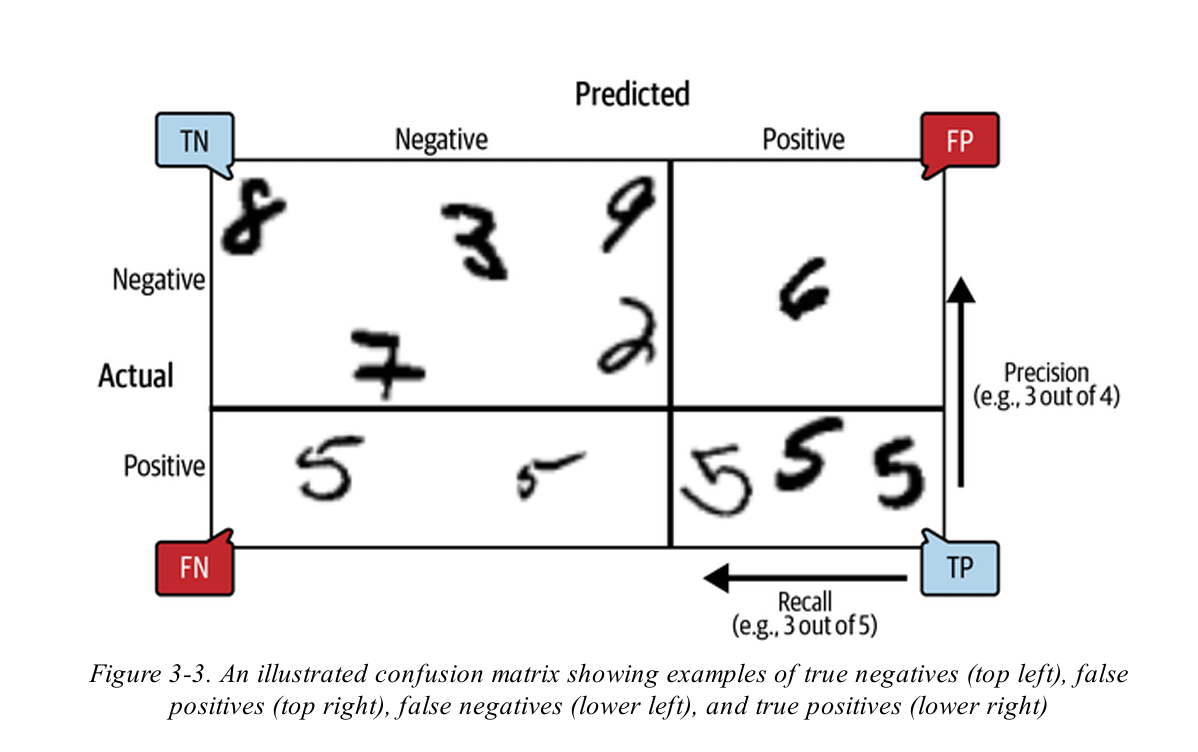

In [19]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)
recall_score(y_train_5, y_train_pred)

0.6511713705958311

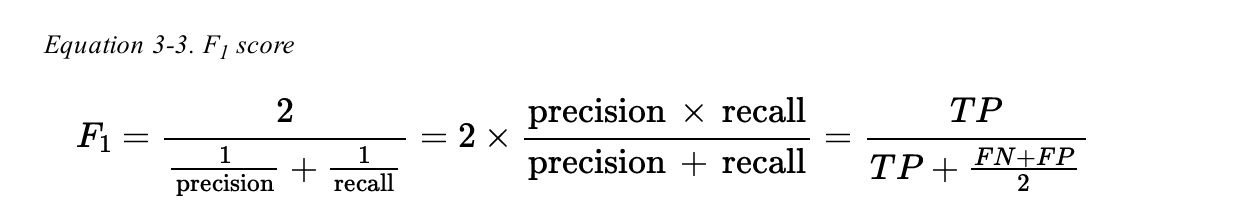

In [20]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343847

F score əsasən precision və recall-ı oxşar olan classifiers-i üstün tutur. Lakin bu həmişə istədiyiniz nəticə olmaya bilər: bəzi hallarda siz daha çox precision-a diqqət yetirirsiniz, digərlərində isə recall daha önəmlidir.

Məsələn, əgər siz classifier-i uşaqlar üçün təhlükəsiz videoları aşkar etmək üçün təlimləndirsəniz, ehtimal ki, siz belə bir classifier-i üstün tutarsınız: çoxlu yaxşı videoları rədd edir (low recall), amma yalnız təhlükəsiz videoları saxlayır (high precision). Bu, daha yüksək recall-a malik, amma bir neçə zərərli videonun məhsulunuza düşməsinə imkan verən classifier-dən daha yaxşıdır. Belə hallarda, hətta insan yoxlama sistemi (human pipeline) əlavə etmək istəyə bilərsiniz ki, classifier-in video seçimini yoxlasın.

Digər tərəfdən, əgər siz classifier-i mağaza oğrularını (shoplifters) aşkar etmək üçün təlimləndirsəniz, 30% precision-a malik olmaq olar, əgər recall 99%-dirsə. (Bəli, təhlükəsizlik əməkdaşları bir neçə yanlış siqnal alacaq, amma demək olar ki, bütün oğrular tutulacaq.)

Təəssüf ki, hər ikisini eyni anda əldə etmək mümkün deyil: precision-ı artırmaq recall-ı azaldır və əksinə. Bu, precision/recall trade-off adlanır.

In [21]:
y_scores=sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [22]:
threshold=0
y_some_digit_pred=(y_scores>threshold)

In [23]:
threshold=3000
y_some_digit_pred=(y_scores>threshold)
y_some_digit_pred

array([False])

In [24]:
y_scores=cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')


In [25]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds=precision_recall_curve(y_train_5, y_scores)

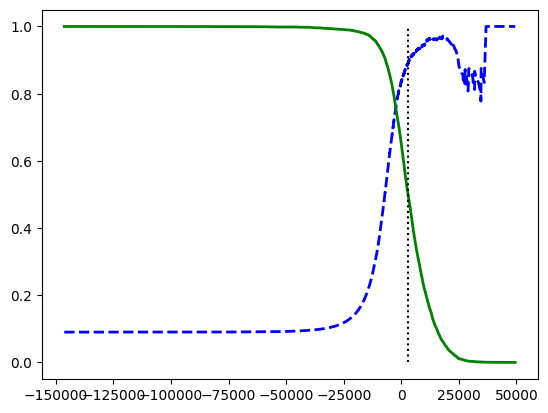

In [26]:
plt.plot(thresholds, precisions[:-1], 'b--', label='Precision', linewidth=2)
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall', linewidth=2)
plt.vlines(threshold, 0, 1.0, 'k', 'dotted', label='threshold')
[...]
plt.show()

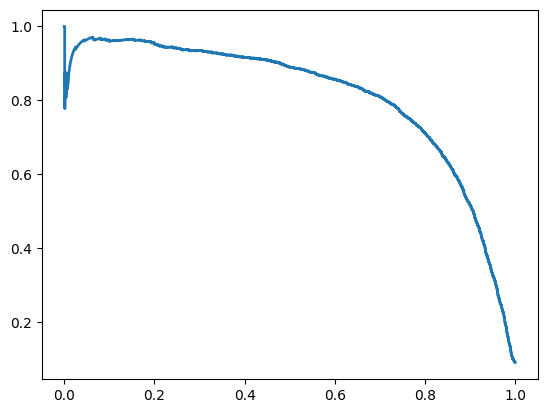

In [27]:
plt.plot(recalls, precisions, linewidth=2, label='Precision/Recall curve')
plt.show()

In [28]:
idx_for_90_precision=(precisions>=0.90).argmax()
threshold_for_90_precision=thresholds[idx_for_90_precision]
threshold_for_90_precision

np.float64(3370.0194991439557)

In [29]:
y_train_pred_90=(y_scores>=threshold_for_90_precision)

In [30]:
precision_score(y_train_5, y_train_pred_90)
recall_at_90_precision=recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.4799852425751706

# The ROC Curve

In [31]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds=roc_curve(y_train_5, y_scores)

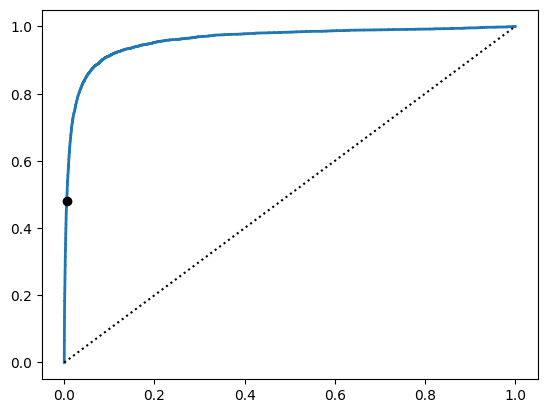

In [32]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")
[...]  # beautify the figure: add labels, grid, legend, arrow, and text
plt.show()


In [33]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

np.float64(0.9604938554008616)

In [34]:
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(random_state=42)

In [35]:
y_probas_forest=cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')



In [36]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [37]:
y_scores_forest=y_probas_forest[:,1]
precisions_forest, recalls_forest, thresholds_forest=precision_recall_curve(y_train_5, y_scores_forest)

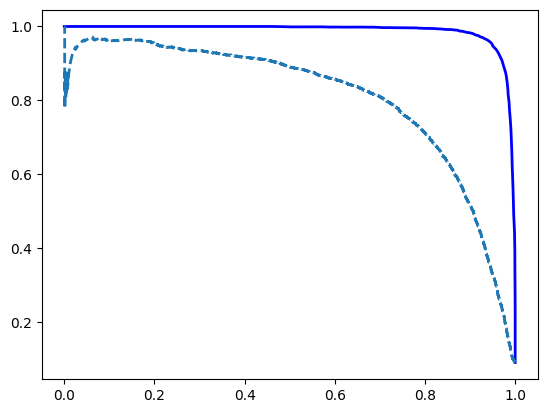

In [38]:
plt.plot(recalls_forest, precisions_forest, 'b-', linewidth=2,
         label='Random Forest')
plt.plot(recalls, precisions, '--', linewidth=2, label='SGD')
plt.show()

In [39]:
y_train_pred_forest=y_probas_forest[:,1]>=0.5
f1_score(y_train_5, y_train_pred_forest)
roc_auc_score(y_train_5, y_scores_forest)

np.float64(0.9983436731328145)

# Multiclass Classification

In [40]:
from sklearn.svm import SVC

svm_clf=SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [41]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [42]:
some_digit_scores=svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [43]:
class_id=some_digit_scores.argmax()
class_id

np.int64(5)

In [44]:
svm_clf.classes_
svm_clf.classes_[class_id]

'5'

In [45]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf=OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [45]:
ovr_clf.predict([some_digit])
len(ovr_clf.estimators_)

In [46]:
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])


array(['3'], dtype='<U1')

In [47]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [48]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')


array([0.87365, 0.85835, 0.8689 ])

In [49]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype('float64'))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

# Error Analysis


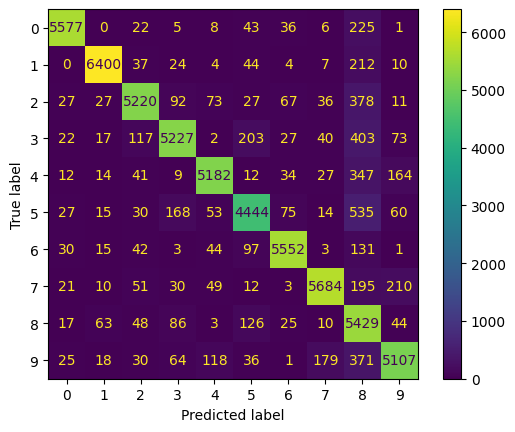

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred=cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

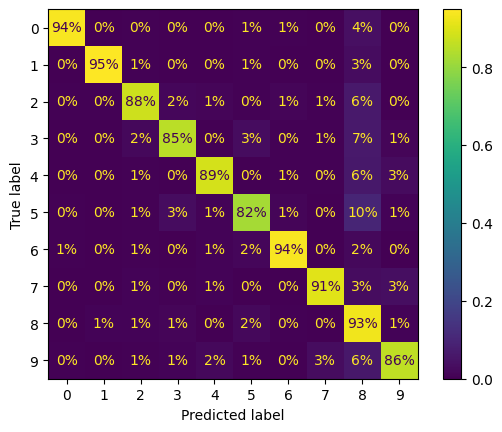

In [51]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize='true', values_format='.0%')
plt.show()

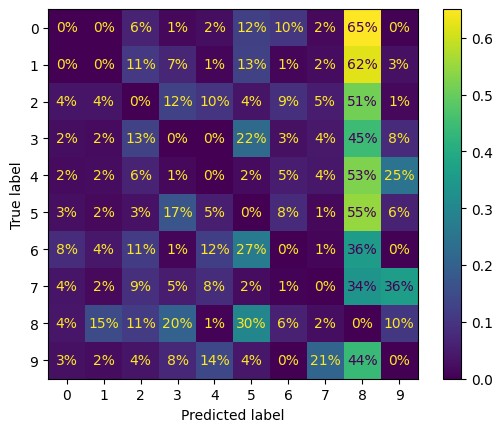

In [52]:
sample_weight=(y_train_pred!=y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weight,
                                        normalize='true', values_format='.0%')
plt.show()

In [53]:
cl_a, cl_b = '3', '5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

# Multilabel Classification

In [54]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large=(y_train>='7')
y_train_odd=(y_train.astype('int8') % 2 == 1)
y_multilabel=np.c_[y_train_large, y_train_odd]

knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [55]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [56]:
y_train_knn_pred=cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average='macro')


0.9764102655606048

In [57]:
from sklearn.multioutput import ClassifierChain

chain_clf=ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])


ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [58]:
chain_clf.predict([some_digit])

array([[0., 1.]])

# Multioutput Classification

In [59]:
np.random.seed(42)
noise=np.random.randint(0,100, (len(X_train), 784))
X_train_mod=X_train+noise
noise=np.random.randint(0,100,(len(X_test), 784))
X_test_mod=X_test+noise
y_train_mod=X_train
y_test_mod=X_test

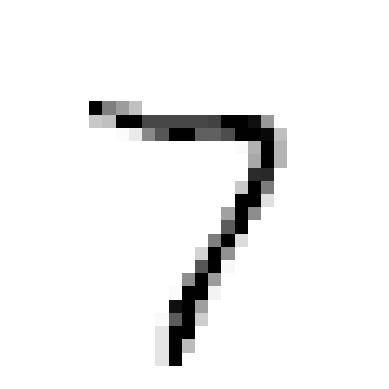

In [60]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit= knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
plt.show()